In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import rise

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">USA Powerlifting Rules</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Lifters are segmented into competitive categories.</li>
    <li style="margin-bottom: 5px;">Categories are segmented by:</li>
    <ul>
      <li>Sex</li>
      <li>Age</li>
      <li>Weightclass</li>
      <li>Equipment Used</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">USA Powerlifting Rules</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Lifters are scored on the total kg of 3 lifts.</li>
    <ul>
      <li>Bench Press</li>
      <li>Squat</li>
      <li>Deadlift</li>
    </ul>
  </ul>
</div>

<b>Data cleaning</b> functions.  Used the USAPL Rulebook from 2021. potential issue: data is from 2017.

In [100]:
def assign_tier(age, division):
    if 'open' in division.lower() or '-o' in division.lower():
        return np.nan
    elif division.lower == 'teens':
        return '3'
    elif '1a' in division.lower():
        return '1a'
    elif '1b' in division.lower():
        return '1b'
    elif '2a' in division.lower():
        return '2a'
    elif '2b' in division.lower():
        return '2b'
    elif '3a' in division.lower():
        return '3a'
    elif '3b' in division.lower():
        return '3b'
    elif '4a' in division.lower():
        return '4a'
    elif '4b' in division.lower():
        return '4b'
    elif '5a' in division.lower():
        return '5a'
    elif '5b' in division.lower():
        return '5b'
    elif '6a' in division.lower():
        return '6a'
    elif '6b' in division.lower():
        return '6b'
    elif 'jr' in division.lower() or 'jnr' in division.lower() or 'junior' in division.lower():
        return np.nan
    elif age < 10:
        return str(1)
    elif age < 12:
        return str(2)
    elif '11' in division:
        return str(2)
    elif age < 14:
        return str(3)
    elif '13' in division:
        return str(3)
    elif age < 16:
        return str(1)
    elif '15' in division:
        return str(1)
    elif age < 18:
        return str(2)
    elif '17' in division:
        return str(2)
    elif age < 20:
        return str(3)
    elif '19' in division:
        return str(3)
    elif age < 25:
        return np.nan
    elif '24' in division:
        return np.nan
    elif age < 40:
        return np.nan
    elif age < 45:
        return '1a'
    elif '44' in division:
        return '1a'
    elif age < 50:
        return '1b'
    elif '49' in division or 'm1' in division.lower():
        return '1b'
    elif age < 55:
        return '2a'
    elif '54' in division:
        return '2a'
    elif age < 60:
        return '2b'
    elif '59' in division or 'm2' in division.lower():
        return '2b'
    elif age < 65:
        return '3a'
    elif '64' in division:
        return '3a'
    elif age < 70:
        return '3b'
    elif '69' in division or 'm3' in division.lower():
        return '3b'
    elif age < 75:
        return '4a'
    elif '74' in division:
        return '4a'
    elif age < 80:
        return '4b'
    elif '79' in division or 'm5' in division.lower():
        return '4b'
    elif age < 85:
        return '5a'
    elif '84' in division:
        return '5b'
    elif age < 90:
        return '6b'
    elif '89' in division or 'm6' in division.lower():
        return '6b'
    elif age >= 90:
        return '6b'
    else:
        return np.nan

In [101]:
def assign_level(age, division):
    if 'open' in division.lower() or '-s' in division.lower():
        return 'Open'
    elif age < 14:
        return 'Youth'
    elif '14' in division:
        return 'Youth'
    elif age < 20:
        return 'Teen'
    elif '16' in division or 'teen' in division.lower():
        return 'Teen'
    elif '18' in division:
        return 'Teen'
    elif age < 25:
        return 'Juniors'
    elif 'jr' in division.lower() or 'jnr' in division.lower() or 'junior' in division.lower() or  '-j' in division.lower():
        return 'Juniors'
    elif age < 40:
        return 'Open'
    elif 'master' in division.lower():
        return 'Masters'
    elif age >= 40:
        return 'Masters'
    else:
        return np.nan

In [102]:
def assign_level2(tier, level):
    if 'a' in tier or 'b' in tier:
        return 'Masters'
    else:
        np.nan

In [103]:
def assign_open_level(division):
    if ('guest' in division.lower() or \
        'disabled' in division.lower() or \
        'novice' in division.lower() or \
        'special' in division.lower() or \
        'amateur' in division.lower() or \
        'handycap' in division.lower() or \
        'veteran' in division.lower() or \
        'wheel' in division.lower()):
        return 'Special'
    else:
        return np.nan

In [104]:
lifts_raw = pd.read_csv('openpowerlifting.csv')

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Raw Data Exploration</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Exploration Topics</li>
    <ul>
      <li>File Info and Data Types</li>
      <li>Examine Header and Some Rows</li>
      <li>Null Value Check</li>
      <li>Distinct Values in Each Column</li>
      <li>Get a Feel for the Data With a Histogram</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">File Info and Data Types</h2>
</div>

In [105]:
lifts_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
dtypes: float64

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">File Info and Data Types</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Notes:</li>
    <ul>
      <li>There are 17 Columns</li>
      <li>386,414 Rows</li>
      <li>Weight Class Datatype is <b>Object</b></li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Examine Header and Some Rows</h2>
</div>

In [106]:
lifts_raw.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Examine Header and Some Rows</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Notes:</li>
    <ul>
      <li>Columns with 4Kg in the name seem worthless</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Null Value Check</h2>
</div>

In [107]:
print(lifts_raw.isnull().sum())

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division           15843
BodyweightKg        2402
WeightClassKg       3812
Squat4Kg          385171
BestSquatKg        88343
Bench4Kg          384452
BestBenchKg        30050
Deadlift4Kg       383614
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
dtype: int64


<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Null Value Check</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Notes:</li>
    <ul>
      <li>Confirmed that columns ending in 4Kg are mostly null</li>
      <li>There are also nulls in some of the Best Lift Categories</li>
    </ul>
  </ul>
</div>

I should have checked the amount of null in age before i attempted to calculate division based on age.  There are 15k plus null divisions.

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Distinct Values in Each Column</h2>
</div>

In [108]:
print(lifts_raw.nunique())

MeetID              8482
Name              136687
Sex                    2
Equipment              5
Age                  167
Division            4246
BodyweightKg        9110
WeightClassKg         51
Squat4Kg             438
BestSquatKg         1507
Bench4Kg             526
BestBenchKg         1470
Deadlift4Kg          573
BestDeadliftKg      1385
TotalKg             4340
Place                 81
Wilks              64827
dtype: int64


<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Distinct Values in Each Column</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Notes:</li>
    <ul>
      <li>There are 4246 unique divisions</li>
      <li>Must standarize in order to analyze</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Get a Feel for the Data With a Histogram</h2>
</div>

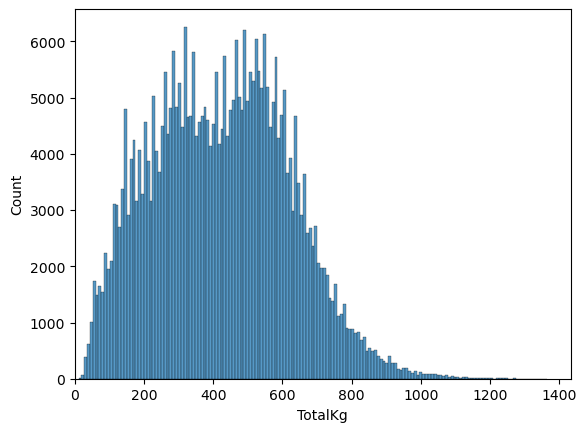

In [109]:
sns.histplot(data=lifts_raw, x='TotalKg')
plt.xlim(left=0)
plt.show()

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Get a Feel for the Data With a Histogram</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Notes:</li>
    <ul>
      <li>Pretty normal but slightly bi-modal</li>
      <li>Check to see if mode is different by Sex</li>
      <li>Check to see if mode is different by Division</li>
    </ul>
  </ul>
</div>

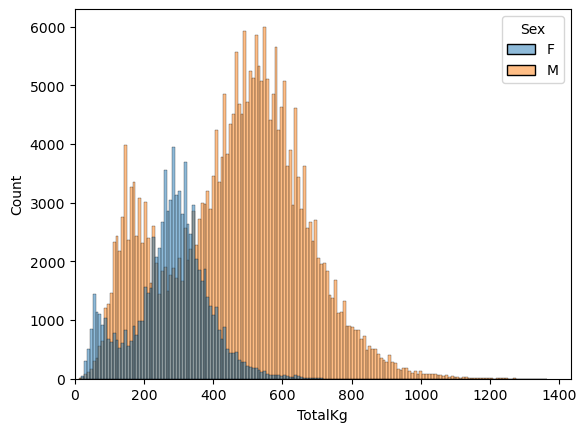

In [110]:
sns.histplot(data=lifts_raw, x='TotalKg', hue='Sex')
plt.xlim(left=0)
plt.show()

In [111]:
lifts = lifts_raw.copy()
lifts['Division'] = lifts['Division'].fillna('').astype(str)
del lifts['Squat4Kg']
del lifts['Bench4Kg']
del lifts['Deadlift4Kg']

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Get a Feel for the Data With a Histogram</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Notes:</li>
    <ul>
      <li>Males and Females are both bi-modal</li>
      <li>Bi-modality is more pronounced <b>within</b> groups</li>
      <li>Nulls in one or more lifts must be the culprit</li>
    </ul>
  </ul>
</div>

In [112]:
lifts.loc[lifts['WeightClassKg'] == '90+', 'WeightClassKg'] = 90
lifts.loc[lifts['WeightClassKg'] == '100+', 'WeightClassKg'] = 100
lifts.loc[lifts['WeightClassKg'] == '110+', 'WeightClassKg'] = 110
lifts.loc[lifts['WeightClassKg'] == '83+', 'WeightClassKg'] = 85
lifts.loc[lifts['WeightClassKg'] == '120+', 'WeightClassKg'] = 120
lifts.loc[lifts['WeightClassKg'] == '140+', 'WeightClassKg'] = 140
lifts.loc[lifts['WeightClassKg'] == '125+', 'WeightClassKg'] = 125
lifts.loc[lifts['WeightClassKg'] == '145+', 'WeightClassKg'] = 145
lifts.loc[lifts['WeightClassKg'] == '84+', 'WeightClassKg'] = 85
lifts.loc[lifts['WeightClassKg'] == '70+', 'WeightClassKg'] = 70
lifts.loc[lifts['WeightClassKg'] == '75+', 'WeightClassKg'] = 75
lifts.loc[lifts['WeightClassKg'] == '67.5+', 'WeightClassKg'] = 70
lifts.loc[lifts['WeightClassKg'] == '60+', 'WeightClassKg'] = 65


In [113]:
lifts['Level'] = lifts.apply(lambda row: assign_level(row['Age'], row['Division']), axis=1)

In [114]:
lifts['Tier'] = lifts.apply(lambda row: assign_tier(row['Age'], row['Division']), axis=1)

In [115]:
lifts['Tier'] = lifts['Tier'].fillna('').astype(str)

In [116]:
lifts['Level2'] = lifts.apply(lambda row: assign_level2(row['Tier'], row['Level']), axis=1)

In [117]:
lifts['OpenLevel'] = lifts['Division'].apply(assign_open_level)

In [118]:
lifts['OpenLevel'] = lifts['OpenLevel'].fillna(lifts['Level'])

In [119]:
lifts['OpenLevel'] = lifts['OpenLevel'].fillna(lifts['Level2'])

In [120]:
lifts['Level'] = lifts['OpenLevel']
del lifts['OpenLevel']

In [121]:
lifts['Division2'] = lifts['Division']
lifts['Division'] = lifts['Level'] + ' ' + lifts['Tier'].fillna(str(1))

In [122]:
lifts['WeightClassKg'] = lifts['WeightClassKg'].astype(float)  
lifts['WeightClassKg'] = (lifts['WeightClassKg'] / 5).round() * 5 

In [123]:
lifts.to_csv('lifts_data.csv', index=False)

In [124]:
print(lifts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        277065 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  float64
 8   BestSquatKg     298071 non-null  float64
 9   BestBenchKg     356364 non-null  float64
 10  BestDeadliftKg  317847 non-null  float64
 11  TotalKg         363237 non-null  float64
 12  Place           385322 non-null  object 
 13  Wilks           362194 non-null  float64
 14  Level           277065 non-null  object 
 15  Tier            386414 non-null  object 
 16  Level2          54874 non-null   object 
 17  Division2 

there are 386,414 total observations in the file.  some of the bestlift columns are missing data.

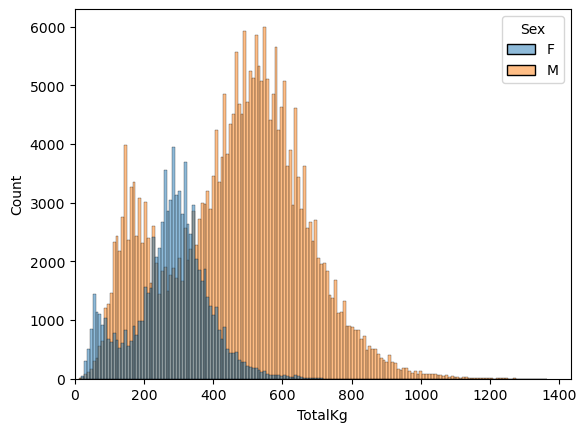

In [125]:
sns.histplot(data=lifts, x='TotalKg', hue='Sex')
plt.xlim(left=0)
plt.show()

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Data Cleanup</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">High Level Efforts</li>
    <ul>
      <li>Clean and Convert Weight Class to Int</li>
      <li>Round Obscure Weight Class Values Into 5Kg Increments</li>       
      <li>Standarize Division Names</li>
      <li>Drop Worthless Columns</li>
      <li>Remove Disqualified Competitors and Incomplete Lifts</li>
    </ul>
  </ul>
</div>

There are negative values in some of the best lift columns

my cleaning logic managed to assign all but 408 divisions.  

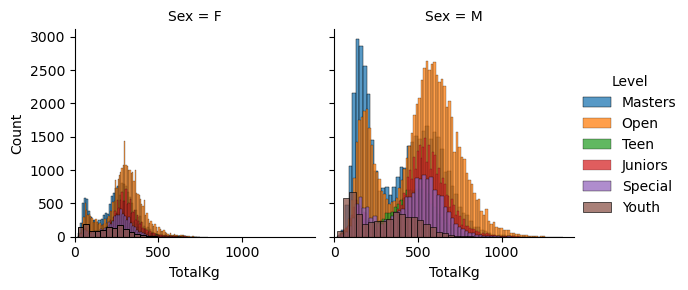

In [126]:
g = sns.FacetGrid(lifts, col='Sex', hue='Level')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

In [127]:
print(lifts.isnull().sum())

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division          109349
BodyweightKg        2402
WeightClassKg       3812
BestSquatKg        88343
BestBenchKg        30050
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
Level             109349
Tier                   0
Level2            331540
Division2              0
dtype: int64


There are 109k divisions left null.  minus the 15k that started as null, and we find we were unable to calculate a category for ~95k.  seems high but some are nonsense.  i will move forward with this.

In [128]:
print(lifts.nunique())

MeetID              8482
Name              136687
Sex                    2
Equipment              5
Age                  167
Division              63
BodyweightKg        9110
WeightClassKg         22
BestSquatKg         1507
BestBenchKg         1470
BestDeadliftKg      1385
TotalKg             4340
Place                 81
Wilks              64827
Level                  6
Tier                  15
Level2                 1
Division2           4247
dtype: int64


I now have 63 unique divisions.  much better. too many.  i think my logic is creating tiers in open or junior divs.

In [129]:
print(lifts.duplicated().sum())

545


I would think duplicates should not happen.  I could clean this up but the duplicaiton rate is  0.01%.  NBD

At this point, i will call my initial iteration of the dataset clean. (note from future derick, you are not done)

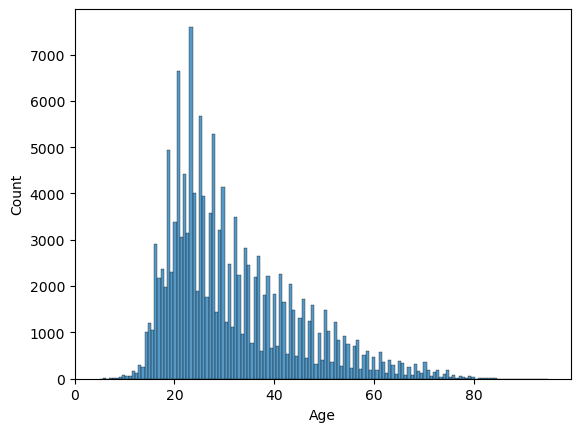

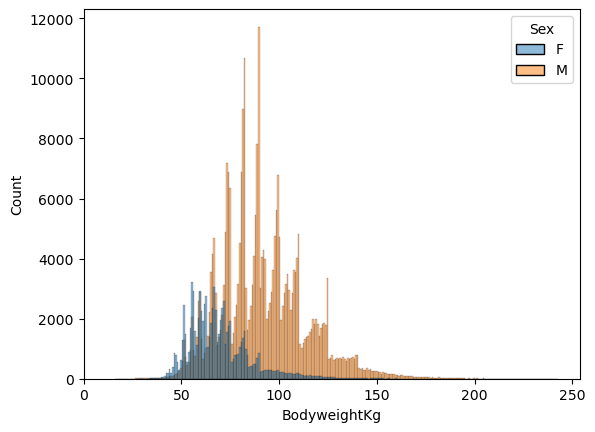

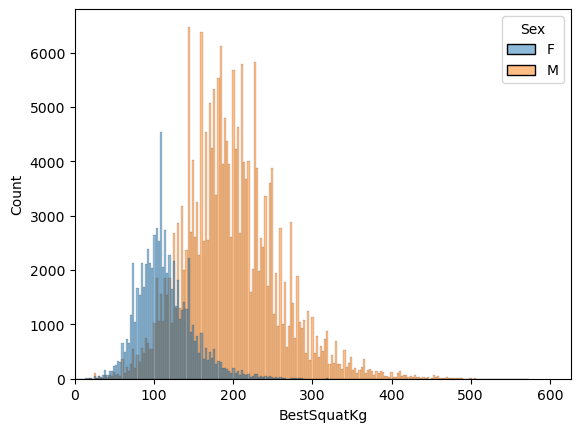

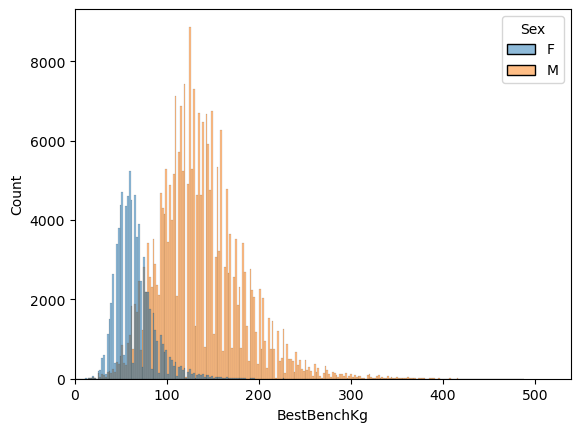

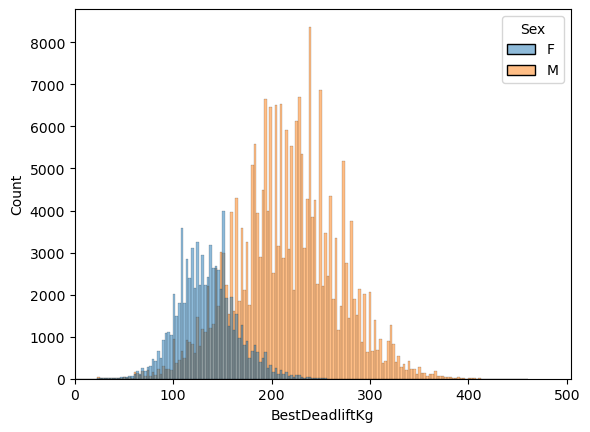

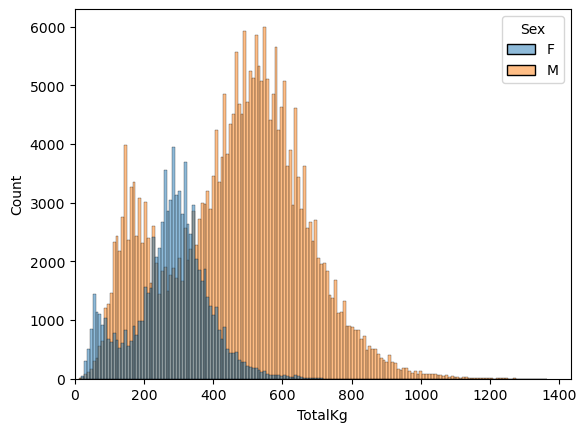

In [130]:
sns.histplot(lifts['Age'])
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BodyweightKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BestSquatKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BestBenchKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BestDeadliftKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='TotalKg', hue='Sex')
plt.xlim(left=0)
plt.show()

the totalkg hist shows bi-modality in both males and females.  WHY???

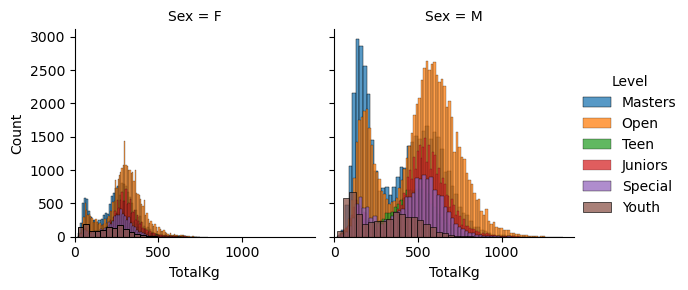

In [131]:
g = sns.FacetGrid(lifts, col='Sex', hue='Level')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

Bimodality does not appear to be due to division.

In [132]:
#test for lifting div differences
print(lifts.groupby('Division')['TotalKg'].describe())
print(lifts.groupby('Level')['TotalKg'].describe())
print(lifts.groupby('Level')['BestSquatKg'].describe())


              count        mean         std    min      25%     50%      75%  \
Division                                                                       
Juniors     50084.0  448.019212  187.284795   20.0  303.900  470.00  582.870   
Juniors 1b      1.0  257.500000         NaN  257.5  257.500  257.50  257.500   
Juniors 3       6.0  469.166667  240.793826  260.0  335.000  371.25  525.625   
Juniors 6b      1.0  398.500000         NaN  398.5  398.500  398.50  398.500   
Masters     10429.0  383.837247  206.547389   25.0  204.120  355.00  555.000   
...             ...         ...         ...    ...      ...     ...      ...   
Youth 1b        1.0  120.000000         NaN  120.0  120.000  120.00  120.000   
Youth 2       183.0  144.195738   78.676019   17.0   96.250  142.50  183.750   
Youth 2b        2.0  268.750000  153.795725  160.0  214.375  268.75  323.125   
Youth 3       478.0  215.343787  113.362225   27.5  140.500  205.00  281.875   
Youth 3a        1.0  172.500000         

Rule out bimodality due to a certian division. I see we have some negative lifts.  Lets drop our disqualified individuals from the dataframe.

In [133]:
lifts = lifts[lifts['Place'] != 'DQ']

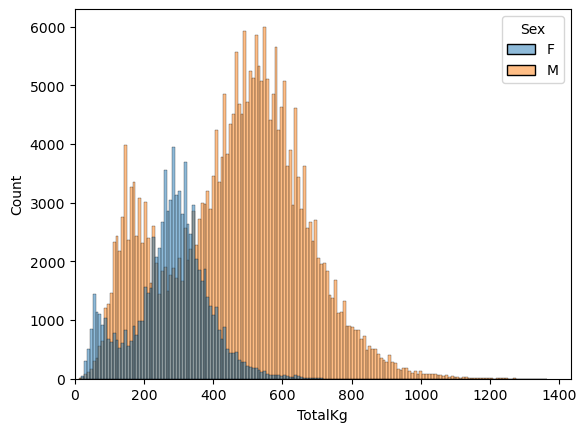

In [134]:
sns.histplot(data=lifts, x='TotalKg', hue='Sex')
plt.xlim(left=0)
plt.show()

Still bi-modal.

In [ ]:
sns.pairplot(lifts[['Age','BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Sex']], hue='Sex')
plt.show()

Still bimodal, but what is interesting is the negative value outliers still showing and the linear trend on the outsides of some scatter plots.

In [ ]:
corr_matrix = lifts[['Age', 'BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Missing a lift impacts total, begin analysis of complete lifts.

In [ ]:
complete_lifts = lifts.copy()
complete_lifts[['BestBenchKg', 'BestSquatKg', 'BestDeadliftKg']] = complete_lifts[['BestBenchKg', 'BestSquatKg', 'BestDeadliftKg']].applymap(lambda x: np.nan if x < 0 else x)
complete_lifts = complete_lifts.dropna(subset=['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg'])

In [ ]:
complete_lifts.to_csv('lifts_data.csv', index=False)

In [ ]:
print(lifts['Sex'].value_counts())
print(lifts['Equipment'].value_counts())
print(lifts['Division'].value_counts())
print(lifts['WeightClassKg'].value_counts())

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Bimodality Re-check</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Before</li>
    <li style="margin-bottom: 5px;">After</li>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Before</h2>
</div>

In [ ]:
g = sns.FacetGrid(lifts, col='Sex', hue='Level')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">After</h2>
</div>

In [ ]:
g = sns.FacetGrid(complete_lifts, col='Sex', hue='Level')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

BINGO, The bimodality is gone.  Lets find something to test.

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Clean Data Exploration</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Find Topics for Further Analysis</li>
    <ul>
      <li>Idnetify Significant Categoric Variables</li>
      <li>Identify Correlated Continious Variables</li>
      <li>Descriptive Statistics of Continious Vars Grouped by Categoric Vars</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Idnetify Significant Categoric Variables</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Chi Squared Analysis</li>
    <ul>
      <li>Create List of Categoric Variables</li>
      <li>Test Each Variable's In a Loop</li>
    </ul>
  </ul>
</div>

In [ ]:
categorical_vars = ['Sex', 'Equipment', 'Level']
target_var1 = 'TotalKg'

In [ ]:
for var in categorical_vars:
    ct = pd.crosstab(lifts[var], lifts[target_var1])
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"{var}: chi-square = {chi2:.2f}, p-value = {p:.4f}")

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Idnetify Significant Categoric Variables</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Notes:</li>
    <ul>
      <li>All Categoric variables are significantly correlated to Total Kg</li>
      <li><b>Duh!</b> This is exaclty why they have competitive categories.</li>
      <li>Equipment is interesting; unlike other categoric variables, it's use is optional</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Identify Correlated Continious Variables</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Correlation Matrix</li>
  </ul>
</div>

In [ ]:
corr_matrix = complete_lifts[['MeetID','Age', 'BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Identify Correlated Continious Variables</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Correlation Matrix</li>
    <ul>
      <li><b>Duh</b> the individual lifts correlate heavily with Total Kg.</li>
      <li>Body Weight is strongly related to the amount competitors can lift.</li>
      <li>I thought Meet Id would have a positive correlation with Total as people break thier PR.</li>
      <li>Meet Id doesn't even correlate positively with age.  Do people not get older?Descriptive Statistics of Continious Vars Grouped by Categoric Vars</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Descriptive Statistics of Continious Vars Grouped by Categoric Vars</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">For Satisfying Assignment Criteria</li>
    <ul>
      <li>Group by Sex and Division</li>
      <li>Group by Equpment</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Group by Equipment and Sex</h2>
</div>

In [ ]:
print(complete_lifts.groupby(['Equipment', 'Sex'])['TotalKg'].describe())

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Group by Division and Sex</h2>
</div>

In [ ]:
print(complete_lifts.groupby(['Level', 'Sex'])['TotalKg'].describe())

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Clean Data Analysis</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Topics Found for Analysis</li>
    <ul>
      <li>Equipment's Impact on Lifts</li>
      <li>Bodyweight Strong Correlation of Total Weight</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Equpiment's Impact on Liftys</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Exploration</li>
    <ul>
      <li>Histogram of Total Kg Distributions by Equipment</li>
      <li>Pairplot of Equipment by Lift</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Histogram of Total Kg Distributions by Equipment</h2>
</div>

In [ ]:
g = sns.FacetGrid(complete_lifts, col='Sex', hue='Equipment')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

Single ply use in males seems to have a slightly lower distribution than raw.  wondering if that is equipment that buffers an injury or something.  multi ply seems to give an advantage in both males and females but is not widely used.

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Pairplot of Equipment By Lift</h2>
</div>

In [ ]:
sns.pairplot(complete_lifts[['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Equipment']], hue='Equipment')
plt.show()

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Equpiment's Impact on Lifts</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Notes:</li>
    <ul>
      <li>Multi-ply is used infrequently but skews higher.</li>
      <li>Multi-ply is especially helpful in deadlifts.</li>
    </ul>
  </ul>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Bodyweight Strong Correlation of Total Weight</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Visualize Total Kg by Weight Class</li>
  </ul>
    <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    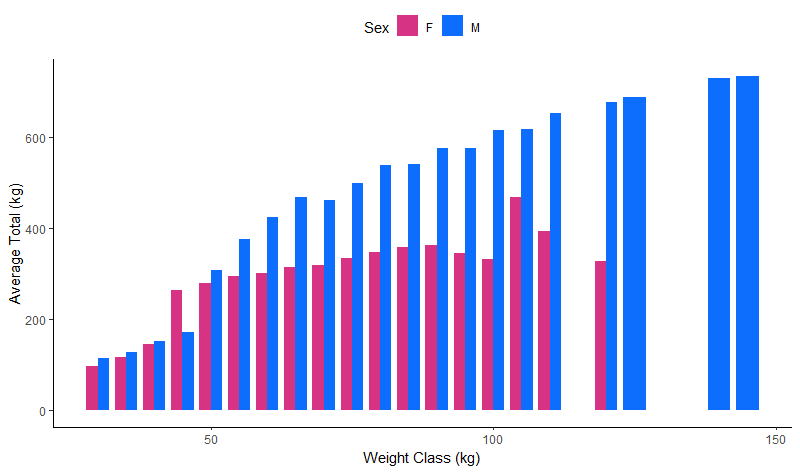
  </div>
</div>

<div style="background-color: #f7f7f7; border: 1px solid #999; padding: 10px; font-size: 16px; color: #333; text-align: left;">
  <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="PowerliftingLogo.png" alt="Powerlifting Logo" style="width: 300px;"/>
  </div>
  <h2 style="font-size: 20px; margin-bottom: 10px; text-transform: uppercase; color: #555;">Questions?</h2>
  <ul style="margin-top: 10px; margin-left: 0; padding-left: 20px;">
    <li style="margin-bottom: 5px;">Thank you</li>
  </ul>
     <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    <img src="https://cdn.dribbble.com/users/690037/screenshots/16636565/media/cc45a8a4fed78aaf3060c767ecd6e19d.jpg?compress=1&resize=800x600&vertical=top" alt="Weight lifter guy" style="width: 300px;"/>
</div>

In [ ]:
print(complete_lifts.describe())

In [ ]:
print(complete_lifts.groupby(['Equipment', 'Sex'])['TotalKg'].describe())
print(complete_lifts.groupby(['Equipment', 'Sex'])['BestBenchKg'].describe())
print(complete_lifts.groupby(['Equipment', 'Sex'])['BestSquatKg'].describe())
print(complete_lifts.groupby(['Equipment', 'Sex'])['BestDeadliftKg'].describe())

In [ ]:
print(complete_lifts.groupby(['Level', 'Sex'])['TotalKg'].describe())
print(complete_lifts.groupby(['Level', 'Sex'])['BestBenchKg'].describe())
print(complete_lifts.groupby(['Level', 'Sex'])['BestSquatKg'].describe())
print(complete_lifts.groupby(['Level', 'Sex'])['BestDeadliftKg'].describe())

In [ ]:
eda_subset = complete_lifts[complete_lifts['Sex'].str.lower() == 'm']

In [ ]:
print(complete_lifts.groupby(['Equipment','Level'])['TotalKg'].describe())
print(complete_lifts.groupby(['Equipment','Level'])['BestBenchKg'].describe())
print(complete_lifts.groupby(['Equipment','Level'])['BestSquatKg'].describe())
print(complete_lifts.groupby(['Equipment','Level'])['BestDeadliftKg'].describe())

In [ ]:
equipment_dummies = pd.get_dummies(complete_lifts['Equipment'], prefix='Eq')
level_dummies = pd.get_dummies(complete_lifts['Level'], prefix='Lvl')
sex_dummies = pd.get_dummies(complete_lifts['Sex'], prefix='Sx')
complete_lifts_rg = pd.concat([complete_lifts, equipment_dummies, level_dummies, sex_dummies], axis=1)

In [ ]:
print(complete_lifts_rg.info())

In [ ]:
print(complete_lifts.info())

In [ ]:
corr_matrix = complete_lifts[['Age', 'BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

cd C:\Users\Dark\Documents\EDA_Final_Project
jupyter-nbconvert Cleaning.ipynb --to slides --post serve
